In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
import matplotlib.pyplot as plt
import networkx as nx
import os

def create_cyclic_visualization(filename="cyclic_viz.png"):
    """
    Generates a simple Cyclic Graph diagram and saves it as an image.
    """
    G = nx.DiGraph()
    nodes = ["Plan", "Act", "Evaluate", "Learn"]
    G.add_edges_from([
        ("Plan", "Act"),
        ("Act", "Evaluate"),
        ("Evaluate", "Learn"),
        ("Learn", "Plan"),  # The Cycle
        ("Evaluate", "End") # The Exit
    ])

    pos = nx.circular_layout(G)

    plt.figure(figsize=(6, 6))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', edgecolors='black')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight="bold")

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20, arrowstyle='->', connectionstyle="arc3,rad=0.1")

    plt.title("Cyclic State Graph Pattern", fontsize=15, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    return filename

def create_slide():
    # 1. Create the Visualization first
    img_path = create_cyclic_visualization()

    # 2. Create Presentation
    prs = Presentation()

    # Use a blank layout (6) to have full control, or Title (0) / Title & Content (1)
    # We will use a blank layout to arrange text on left and image on right manually
    slide_layout = prs.slide_layouts[6]
    slide = prs.slides.add_slide(slide_layout)

    # --- ADD TITLE ---
    title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.4), Inches(9), Inches(1))
    title_frame = title_box.text_frame
    title_p = title_frame.add_paragraph()
    title_p.text = "Why LangGraph? The Need for Cyclic State Machines"
    title_p.font.size = Pt(32)
    title_p.font.bold = True
    title_p.font.name = 'Arial'

    # --- ADD CONTENT (Left Side) ---
    # Define text box dimensions
    content_box = slide.shapes.add_textbox(Inches(0.5), Inches(1.5), Inches(5.5), Inches(5.5))
    tf = content_box.text_frame
    tf.word_wrap = True

    # Helper to add bullet points
    def add_bullet(text_frame, text, level=0, bold=False, size=16):
        p = text_frame.add_paragraph()
        p.text = text
        p.level = level
        p.font.size = Pt(size)
        p.font.name = 'Arial'
        if bold:
            p.font.bold = True
        # Add a little spacing
        p.space_before = Pt(6)
        return p

    # Section 1
    add_bullet(tf, "1. The Limitation of Linear Chains (DAGs)", level=0, bold=True, size=18)
    add_bullet(tf, "Rigid Execution: Standard LLM chains follow a strict Input -> Step A -> Step B pipeline.", level=1)
    add_bullet(tf, "Fragility: If one step fails, the entire chain breaks.", level=1)
    add_bullet(tf, "No \"Retry\" Logic: Cannot naturally loop back to fix mistakes without restarting.", level=1)

    # Section 2
    add_bullet(tf, "2. The Solution: Cyclic State Graphs", level=0, bold=True, size=18)
    add_bullet(tf, "Loops & Cycles: Agents can Plan -> Act -> Fail -> Learn -> Retry.", level=1)
    add_bullet(tf, "Persistence (State): Shared memory persists across loops, remembering prior failures.", level=1)
    add_bullet(tf, "Engineering Control: Replace prompt magic with code (Conditional Edges).", level=1)

    # Key Takeaway
    p = tf.add_paragraph()
    p.text = "\nKey Takeaway: Real agents need to iterate. LangGraph provides the architecture for iteration."
    p.font.size = Pt(16)
    p.font.bold = True
    #p.font.color.rgb = 0x000000 # Black (or use RGBColor for custom)

    # --- ADD IMAGE (Right Side) ---
    # Adjust position to sit to the right of the text
    slide.shapes.add_picture(img_path, Inches(6.2), Inches(2.0), width=Inches(3.5))

    # --- SAVE ---
    output_filename = "LangGraph_Intro_Slide.pptx"
    prs.save(output_filename)
    print(f"Presentation saved as '{output_filename}'")

    # Cleanup the temporary image
    if os.path.exists(img_path):
        os.remove(img_path)

if __name__ == "__main__":
    create_slide()

In [34]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import os

# Create or load presentation
if os.path.exists('Agentic_Patterns_Presentation.pptx'):
    prs = Presentation('Agentic_Patterns_Presentation.pptx')
else:
    prs = Presentation() # Fallback if file doesn't exist

# --- HELPER FUNCTION (Reused) ---
def create_code_slide(prs, title_text, description, code_text):
    slide_layout = prs.slide_layouts[1] # Title + Content
    slide = prs.slides.add_slide(slide_layout)

    # Title
    title = slide.shapes.title
    title.text = title_text

    # Description (Top half)
    body = slide.placeholders[1]
    tf = body.text_frame
    tf.text = description

    # Code Box (Bottom half)
    left = Inches(0.5)
    top = Inches(3.5)
    width = Inches(9)
    height = Inches(3.5)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf_code = txBox.text_frame
    tf_code.text = code_text

    # Simple syntax highlighting simulation (Monospace font)
    for paragraph in tf_code.paragraphs:
        paragraph.font.name = "Courier New"
        paragraph.font.size = Pt(11)
        paragraph.font.color.rgb = RGBColor(50, 50, 50)

# --- CONTENT: RAGAS & DSPY ---

slides_data = [
    {
        "title": "6. Evaluating Agents with RAGAS",
        "desc": (
            "Concept: Automated Evaluation\n"
            "RAGAS (Retrieval Augmented Generation Assessment) uses an 'LLM-as-a-Judge' "
            "to score your agent's performance without human intervention.\n\n"
            "Key Metrics:\n"
            "1. Faithfulness: Is the answer derived from the retrieved context? (Hallucination check)\n"
            "2. Answer Relevance: Does the answer actually address the user's question?\n"
            "3. Context Precision: Did the retrieval system find the right data?"
        ),
        "code": """# RAGAS MENTAL MODEL
# Input -> [Agent] -> Output + Retrieved Context -> [RAGAS Judge] -> Scores

from ragas import evaluate
from ragas.metrics import faithfulness, answer_relevancy, context_precision

# 1. Prepare Dataset (Questions, Answers, and Retrieved Contexts)
data = {
    "question": ["What is the capital of France?"],
    "answer": ["Paris is the capital."],
    "contexts": [["Paris is the capital and most populous city of France."]]
}

# 2. Run Evaluation
results = evaluate(
    dataset=data,
    metrics=[faithfulness, answer_relevancy, context_precision]
)

print(results)
# Output: {'faithfulness': 0.99, 'answer_relevancy': 0.95, ...}"""
    },
    {
        "title": "7. RAGAS Implementation Details",
        "desc": (
            "Integration with LangGraph:\n"
            "To evaluate a LangGraph agent, you must capture the 'trace' of the execution. "
            "Specifically, you need to extract the final `generation` and the intermediate `documents` "
            "from the state before passing them to RAGAS.\n\n"
            "Visual Flow:\n"
            "[User Input] -> [LangGraph Agent] -> [State Log] -> [RAGAS Evaluation Pipeline]"
        ),
        "code": """# EVALUATING A LANGGRAPH NODE
def evaluation_node(state):
    # Extract data from the graph state
    query = state["question"]
    generated_answer = state["answer"]
    retrieved_docs = state["documents"]

    # Score purely for logging/monitoring purposes
    score = evaluate_faithfulness(query, generated_answer, retrieved_docs)

    print(f"--- RAGAS FAITHFULNESS SCORE: {score} ---")

    # Optional: Fail the run if score is too low
    if score < 0.7:
        return {"quality_check": "FAIL"}
    return {"quality_check": "PASS"}"""
    },
    {
        "title": "8. Optimization with DSPy",
        "desc": (
            "Concept: Programming over Prompting\n"
            "DSPy (Declarative Self-improving Python) replaces fragile manual prompt engineering "
            "with composable modules and optimizers. It treats LLMs like PyTorch layers.\n\n"
            "How it works:\n"
            "1. Signature: Define input/output types (e.g., Question -> Answer).\n"
            "2. Module: Define the pipeline (e.g., ChainOfThought, Retrieve).\n"
            "3. Teleprompter (Optimizer): Automatically compiles prompts and selects "
            "few-shot examples to maximize a metric."
        ),
        "code": """import dspy
from dspy.teleprompt import BootstrapFewShot

# 1. Define a Signature (The "Interface")
class MathSolver(dspy.Signature):
    \"\"\"Solve mathematics word problems.\"\"\"
    question = dspy.InputField()
    answer = dspy.OutputField(desc="The final numerical answer")

# 2. Define a Module (The "Layer")
class CoTMath(dspy.Module):
    def __init__(self):
        super().__init__()
        # ChainOfThought adds a "Reasoning" step automatically
        self.prog = dspy.ChainOfThought(MathSolver)

    def forward(self, question):
        return self.prog(question=question)"""
    },
    {
        "title": "9. DSPy Example: Tuning for Math",
        "desc": (
            "Scenario: Solving GSM8K (Grade School Math) Problems.\n"
            "Instead of writing 'You are a math genius...' in the prompt, we let the "
            "BootstrapFewShot optimizer 'compile' the best examples into the prompt for us.\n\n"
            "Source: https://dspy.ai/tutorials/math/"
        ),
        "code": """# 3. Load Data (GSM8K Training Set)
trainset = [dspy.Example(question="If I have 3 apples...", answer="5").with_inputs('question'), ...]

# 4. Define Metric (Exact Match)
def validate_math(example, pred, trace=None):
    return example.answer == pred.answer

# 5. Compile (Optimize) the Agent
# This learns which "Few-Shot" examples help the LLM solve math best.
teleprompter = BootstrapFewShot(metric=validate_math)
compiled_math_agent = teleprompter.compile(CoTMath(), trainset=trainset)

# 6. Run
result = compiled_math_agent(question="What is 50% of 200?")
print(result.answer) # Output: 100"""
    }
]

# --- GENERATE SLIDES ---

for slide_data in slides_data:
    create_code_slide(prs, slide_data["title"], slide_data["desc"], slide_data["code"])

# --- SAVE FINAL DECK ---
output_file = 'Agentic_Patterns_Eval_Opt.pptx'
prs.save(output_file)
print(f"Presentation saved successfully as '{output_file}'")

Presentation saved successfully as 'Agentic_Patterns_Eval_Opt.pptx'


In [14]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

def create_part3_presentation():
    prs = Presentation()

    # --- HELPER: Add Title & Content Slide ---
    def add_text_slide(title, content_list):
        slide_layout = prs.slide_layouts[1]
        slide = prs.slides.add_slide(slide_layout)
        slide.shapes.title.text = title

        tf = slide.placeholders[1].text_frame
        for point in content_list:
            p = tf.add_paragraph()
            p.text = point
            p.font.size = Pt(20)
            p.space_after = Pt(10)

    # --- HELPER: Add Visualization Placeholder Slide ---
    def add_vis_slide(title, description, note=None):
        slide_layout = prs.slide_layouts[5] # Title Only
        slide = prs.slides.add_slide(slide_layout)
        slide.shapes.title.text = title + " (Visualization)"

        # Add a large box representing the image
        left = Inches(1)
        top = Inches(2)
        width = Inches(8)
        height = Inches(4.5)

        shape = slide.shapes.add_shape(
            1, # msoShapeRectangle
            left, top, width, height
        )
        shape.fill.solid()
        shape.fill.fore_color.rgb = RGBColor(230, 230, 250) # Lavender
        shape.line.color.rgb = RGBColor(100, 100, 100)

        # Add text inside the box describing what to insert
        tf = shape.text_frame
        p = tf.paragraphs[0]
        p.text = description
        p.alignment = PP_ALIGN.CENTER
        p.font.color.rgb = RGBColor(0, 0, 0)
        p.font.bold = True

        if note:
            p2 = tf.add_paragraph()
            p2.text = f"\n{note}"
            p2.alignment = PP_ALIGN.CENTER
            p2.font.size = Pt(14)

    # ==========================================
    # SLIDE 1: Title
    # ==========================================
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = "Part 3: Application Architecture"
    slide.placeholders[1].text = "How to Harness the Random Machine: Grounding, RAG, and Evaluation\nPresenter: Marcin Wizgird"

    # ==========================================
    # SECTION 1: CORE ARCHITECTURE PRINCIPLE
    # ==========================================

    # Text Slide
    add_text_slide("1. The Core Principle: Forget the Weights", [
        "The Danger of Parametric Knowledge:",
        "- Weights store compressed, static, lossy correlations (Hallucinations).",
        "- Weights are outdated the moment training finishes.",
        "The Engineering Solution:",
        "- Treat the LLM as a Reasoning Engine, not a Database.",
        "- 'Grounding': Force the model to answer ONLY using the provided Context.",
        "- System Prompt: 'Answer strictly based on the provided text. If not found, say I don't know.'"
    ])

    # ==========================================
    # SECTION 2: PROMPTING TECHNIQUES
    # ==========================================

    # Text Slide
    add_text_slide("2. Prompting to Avoid Hallucination", [
        "Prompt Engineering is the first line of defense.",
        "Few-Shot Learning:",
        "- Providing 3-5 examples of input->output significantly reduces variance.",
        "- Teaches the 'format' and 'style' without weight updates.",
        "Advanced Reasoning Patterns:",
        "- Chain of Thought (CoT): 'Let's think step by step'.",
        "- ReAct (Reason + Act): Interleaving thought with tool usage.",
        "- Tree of Thoughts (ToT): Exploring multiple reasoning paths."
    ])

    # Visualization Slide
    add_vis_slide(
        "Prompting Patterns Visualization",
        "INSERT YOUR EXISTING SLIDES HERE\n\n"
        "(Place your prepared slides for CoT, ReAct, and ToT here)",
        "Note: You mentioned you have these slides ready."
    )

    # ==========================================
    # SECTION 3: RAG & KNOWLEDGE
    # ==========================================

    # Text Slide
    add_text_slide("3. RAG: Injecting Truth", [
        "Retrieval Augmented Generation (RAG) provides the 'Open Book' for the exam.",
        "Search Methods:",
        "- Vector Search (Dense): Semantic meaning ('King' - 'Man' + 'Woman' = 'Queen').",
        "- Keyword/Hybrid Search (Sparse): Exact match (BM25) for specific product IDs or names.",
        "GraphRAG (Knowledge Graphs):",
        "- Grounding on relationships, not just similarity.",
        "- Solves the 'Global Question' problem (e.g., 'What are the main themes in this dataset?')."
    ])

    # Visualization Slide
    add_vis_slide(
        "GraphRAG Visualization",
        "INSERT IMAGE: GraphRAG Architecture\n\n"
        "Visual showing: Documents -> Entity Extraction -> Knowledge Graph -> Community Summaries -> LLM Answer",
        "Contrast this with standard Vector RAG (which just finds chunks)."
    )

    # ==========================================
    # SECTION 4: EVALUATION & RAGAS
    # ==========================================

    # Text Slide
    add_text_slide("4. Evaluating the 'Random Machine'", [
        "The problem: How do you unit test a poem?",
        "Traditional metrics (BLEU/ROUGE) check text overlap, not meaning.",
        "RAGAS (Retrieval Augmented Generation Assessment):",
        "- Uses an LLM to grade an LLM.",
        "Key Metrics:",
        "- Faithfulness: Is the answer derived *only* from the context? (Hallucination check).",
        "- Answer Relevance: Did it actually answer the user's question?",
        "- Context Recall: Did retrieval find the right information?"
    ])

    # Visualization Slide
    add_vis_slide(
        "RAGAS Metrics Visualization",
        "INSERT DIAGRAM: The RAGAS Triad\n\n"
        "Triangle showing relationship between:\n"
        "1. Question\n"
        "2. Context (Retrieved Docs)\n"
        "3. Answer\n\n"
        "Arrows labeled with metrics (Faithfulness, Relevance, Recall)",
        "Source: RAGAS Documentation"
    )

    # ==========================================
    # SECTION 5: AGENTIC EVALUATION & DSPY
    # ==========================================

    # Text Slide
    add_text_slide("5. Agentic Evaluation & DSPy", [
        "Agentic Evaluation (LLM-as-a-Judge):",
        "- Pattern: Use GPT-4o to grade the output of Llama-3-8b.",
        "- We write a 'Rubric' in the prompt: 'Grade from 1-5 based on helpfulness.'",
        "DSPy (Declarative Self-improving Language Programs):",
        "- 'Programming, not Prompting'.",
        "- Instead of manual prompt tuning, we define modules and an optimizer.",
        "- DSPy 'compiles' the best prompt for your specific metric."
    ])

    # Visualization Slide
    add_vis_slide(
        "DSPy Flow Visualization",
        "INSERT IMAGE: DSPy Optimizer Flow\n\n"
        "Show: [Signature: Question -> Answer] -> [Optimizer] -> [Optimized Prompt]",
        "Caption: Treating Prompts as Weights that can be optimized."
    )

    # Save
    prs.save('LLM_Training_Part3.pptx')
    print("Presentation saved as 'LLM_Training_Part3.pptx'")

# Run
create_part3_presentation()

Presentation saved as 'LLM_Training_Part3.pptx'


In [15]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# --- CONTENT DEFINITIONS ---

patterns = [
    {
        "title": "1. The Reflection Pattern",
        "subtitle": "The 'Editor' or 'System 2' Thinking",
        "description": (
            "Description:\n"
            "Separates 'Drafting' from 'Reviewing'. The agent critiques its own output "
            "to improve quality before showing it to the user.\n\n"
            "Mental Model:\n"
            "A Junior Developer writes code, and a Senior Developer reviews it. "
            "They iterate until the Senior Dev approves."
        ),
        "code": """# REFLECTION PATTERN
class ReflectionState(MessagesState):
    iterations: int

def generator_node(state):
    return {"iterations": state.get("iterations", 0) + 1}

def reflector_node(state):
    # LLM critiques the draft here
    return {}

def should_continue(state):
    if state["iterations"] > 2: return END
    return "generator_node"

workflow = StateGraph(ReflectionState)
workflow.add_node("generator", generator_node)
workflow.add_node("reflector", reflector_node)
workflow.add_edge(START, "generator")
workflow.add_edge("generator", "reflector")
workflow.add_conditional_edges("reflector", should_continue)""",
        "viz_code": """graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))"""
    },
    {
        "title": "2. Plan-and-Execute Pattern",
        "subtitle": "The 'Project Manager'",
        "description": (
            "Description:\n"
            "The agent creates a full step-by-step plan UPFRONT, rather than "
            "reacting one step at a time. It maintains a 'Plan State' and checks items off.\n\n"
            "Mental Model:\n"
            "A Project Manager creates a To-Do list. A Worker does the first task. "
            "The Manager updates the list based on the result."
        ),
        "code": """# PLAN-AND-EXECUTE
class PlanExecuteState(MessagesState):
    plan: List[str]

def planner_agent(state):
    return {"plan": ["Step 1", "Step 2", "Step 3"]}

def executor_agent(state):
    # Execute state["plan"][0]
    return {}

def replanner_agent(state):
    # Remove finished step
    return {"plan": state["plan"][1:]}

workflow.add_node("planner", planner_agent)
workflow.add_node("executor", executor_agent)
workflow.add_node("replanner", replanner_agent)
# Edges: Planner -> Executor -> Replanner -> (Loop or End)""",
        "viz_code": """graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))"""
    },
    {
        "title": "3. Orchestrator-Workers Pattern",
        "subtitle": "The 'Parallel Processor'",
        "description": (
            "Description:\n"
            "A central node breaks a large task into independent sub-tasks and spins up "
            "workers to run them in PARALLEL.\n\n"
            "Mental Model:\n"
            "A News Editor assigns 3 reporters to interview 3 different sources at the same time. "
            "The Editor then combines their notes into one story."
        ),
        "code": """# ORCHESTRATOR (Map-Reduce)
def map_tasks(state) -> List[Send]:
    tasks = ["Topic A", "Topic B", "Topic C"]
    # Spin up 3 parallel nodes
    return [Send("worker_node", {"task": t}) for t in tasks]

def worker_node(state):
    return {"results": [f"Result for {state['task']}"]}

def synthesizer(state):
    # Combine results
    return {}

workflow.add_conditional_edges("orchestrator", map_tasks, ["worker_node"])
workflow.add_edge("worker_node", "synthesizer")""",
        "viz_code": """# Requires 'draw_method=MermaidDrawMethod.PYPPETEER'
# to visualize the parallel branches correctly."""
    },
    {
        "title": "4. Hierarchical Teams Pattern",
        "subtitle": "The 'Recursive Graph'",
        "description": (
            "Description:\n"
            "Uses Subgraphs to isolate complexity. A top-level graph delegates a task to a "
            "child graph (a specialized team) and awaits the final output.\n\n"
            "Mental Model:\n"
            "A CEO tells the VP of Engineering to 'Build X'. The VP runs their own internal "
            "team loop (Code->Test->Fix) and reports back only when finished."
        ),
        "code": """# HIERARCHICAL SUBGRAPHS
# 1. Create Child Graph
child_workflow = StateGraph(MessagesState)
child_workflow.add_node("coder", coder_node)
child_app = child_workflow.compile()

# 2. Add Child as Node in Parent
parent_workflow = StateGraph(MessagesState)
parent_workflow.add_node("supervisor", supervisor_node)
parent_workflow.add_node("coding_team", child_app)

parent_workflow.add_edge("supervisor", "coding_team")
parent_workflow.add_edge("coding_team", END)""",
        "viz_code": """# Visualizing this will show the 'coding_team'
# as a single encapsulated node in the main graph."""
    },
    {
        "title": "5. RAG Agent Pattern",
        "subtitle": "Self-Correcting Retrieval",
        "description": (
            "Description:\n"
            "An active reasoning loop for RAG. It doesn't blindly trust retrieval. "
            "It evaluates document relevance and rewrites queries if results are poor.\n\n"
            "Mental Model:\n"
            "A Researcher searches a library, reads abstracts, decides they aren't relevant, "
            "and rewrites their search query to try again."
        ),
        "code": """# RAG AGENT LOOP
def evaluate_node(state) -> Literal["reformulate", "generate"]:
    # Grade the retrieved documents
    if state["quality"] == "POOR":
        return "reformulate"
    return "generate"

workflow.add_node("reformulate", rewrite_query)
workflow.add_node("retrieve", fetch_docs)
workflow.add_node("rerank", score_docs)
workflow.add_node("generate", llm_answer)

workflow.add_edge("reformulate", "retrieve")
workflow.add_edge("retrieve", "rerank")
workflow.add_conditional_edges("rerank", evaluate_node)""",
        "viz_code": """# Shows a distinct loop back from
# Evaluation -> Reformulation"""
    }
]

# --- HELPER FUNCTIONS ---

def create_title_slide(prs, title_text, subtitle_text):
    slide_layout = prs.slide_layouts[0] # Title Slide
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    subtitle = slide.placeholders[1]
    title.text = title_text
    subtitle.text = subtitle_text

def create_content_slide(prs, title_text, content_text):
    slide_layout = prs.slide_layouts[1] # Title + Content
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    content = slide.placeholders[1]
    title.text = title_text
    content.text = content_text

def create_code_slide(prs, title_text, code_text):
    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = f"{title_text} - Implementation"

    # create a text box for code
    left = Inches(0.5)
    top = Inches(1.5)
    width = Inches(9)
    height = Inches(5.5)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    tf.text = code_text

    # Format as code (Monospace)
    for paragraph in tf.paragraphs:
        paragraph.font.name = "Courier New"
        paragraph.font.size = Pt(12)
        paragraph.font.color.rgb = RGBColor(0, 0, 0)

# --- MAIN GENERATION ---

def generate_pptx():
    prs = Presentation()

    # 1. Main Title
    create_title_slide(prs,
                       "Advanced Agentic Patterns",
                       "Architectures with LangGraph\n\n1 Hour Technical Overview")

    # 2. Introduction
    create_content_slide(prs, "Agenda",
                         "1. The Reflection Pattern (Quality Control)\n"
                         "2. Plan-and-Execute (Long-horizon tasks)\n"
                         "3. Orchestrator-Workers (Parallelization)\n"
                         "4. Hierarchical Teams (Subgraphs)\n"
                         "5. RAG Agent (Self-Correction Loop)")

    # 3. Iterate through patterns
    for p in patterns:
        # Slide A: Description & Mental Model
        create_content_slide(prs, p["title"], p["description"])

        # Slide B: Code Implementation
        create_code_slide(prs, p["title"], p["code"])

        # Slide C: Visualization Placeholder
        slide_layout = prs.slide_layouts[5] # Blank
        slide = prs.slides.add_slide(slide_layout)
        title = slide.shapes.title
        title.text = f"{p['title']} - Visualization"

        # Add visual placeholder text
        left = Inches(2)
        top = Inches(3)
        width = Inches(6)
        height = Inches(2)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.text = "(Insert LangGraph Diagram Here)\n\nCode to generate:"
        p_viz = tf.add_paragraph()
        p_viz.text = p["viz_code"]
        p_viz.font.name = "Courier New"
        p_viz.font.size = Pt(10)

    # 4. Save
    prs.save('Agentic_Patterns_Presentation.pptx')
    print("Presentation generated successfully: 'Agentic_Patterns_Presentation.pptx'")

if __name__ == "__main__":
    generate_pptx()

Presentation generated successfully: 'Agentic_Patterns_Presentation.pptx'


In [ ]:
import operator
from typing import Annotated, List, Literal, TypedDict, Union
from typing_extensions import TypedDict

from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, BaseMessage
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, END, START
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver

# --- 1. CONFIGURATION & SCHEMA ---

# A. Define the Structured Output Schema (The goal)
class WeatherReport(BaseModel):
    """The final structured response we want."""
    city: str = Field(description="The city mentioned")
    temperature: str = Field(description="The temperature found")
    advice: str = Field(description="Clothing advice based on weather")
    confidence: int = Field(description="Confidence score 1-10")

# B. Define the State
class AgentState(TypedDict):
    # 'operator.add' appends new messages to the history rather than overwriting
    messages: Annotated[List[BaseMessage], operator.add]

# --- 2. DEFINE TOOLS ---

@tool
def get_weather(city: str) -> str:
    """Fetches the current weather for a specific city."""
    # Mock data for demonstration
    if "warsaw" in city.lower():
        return "It is rainy and 12°C."
    elif "sf" in city.lower() or "san francisco" in city.lower():
        return "It is sunny and 22°C."
    return "Weather unknown."

tools = [get_weather]

# --- 3. DEFINE NODES ---

# Initialize LLM
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# Node 1: The Agent (Reasoning & Tool Selection)
def agent_node(state: AgentState):
    # Bind tools so the LLM knows it can use them
    llm_with_tools = llm.bind_tools(tools)
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

# Node 2: Tool Execution (Prebuilt by LangGraph)
tool_node = ToolNode(tools)

# Node 3: Structured Formatter (The Final Step)
def formatter_node(state: AgentState):
    """Takes the conversation history and generates the final JSON."""
    structured_llm = llm.with_structured_output(WeatherReport)

    # We summarize the entire conversation into the strict schema
    prompt = "Review the conversation history and generate the final report."
    # We pass the history + the prompt
    chain = structured_llm

    # Invoke with the full message history
    report = chain.invoke(state["messages"] + [HumanMessage(content=prompt)])

    # Return as a special AIMessage or just print it
    # Here we return it as a message to store in history
    return {"messages": [AIMessage(content=f"FINAL_JSON: {report.json()}")]}

# --- 4. DEFINE EDGES (Logic) ---

def should_continue(state: AgentState):
    last_message = state["messages"][-1]

    # If the LLM called a tool, go to 'tools' node
    if last_message.tool_calls:
        return "tools"

    # If LLM is done (has text), go to 'formatter' to structure it
    return "formatter"

# --- 5. BUILD GRAPH ---

workflow = StateGraph(AgentState)

# Add Nodes
workflow.add_node("agent", agent_node)
workflow.add_node("tools", tool_node)
workflow.add_node("formatter", formatter_node)

# Set Entry
workflow.set_entry_point("agent")

# Add Edges
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "tools": "tools",
        "formatter": "formatter"
    }
)

workflow.add_edge("tools", "agent")     # Loop back: Agent -> Tools -> Agent
workflow.add_edge("formatter", END)     # Finish after formatting

# --- 6. COMPILE WITH MEMORY ---

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

# --- 7. RUN DEMONSTRATION ---

# Config acts as the session ID
config = {"configurable": {"thread_id": "session_001"}}

print("--- Turn 1: User asks for weather (Triggers Tool) ---")
inputs = {"messages": [HumanMessage(content="Check the weather in Warsaw.")]}

for event in app.stream(inputs, config=config):
    for node, values in event.items():
        # Print only the new messages added by the node
        msg = values["messages"][-1]
        print(f"📍 Node '{node}': {msg.content if isinstance(msg.content, str) else 'Tool Call'}")

print("\n" + "="*40 + "\n")

print("--- Turn 2: User asks follow up (Triggers Memory + Structured Output) ---")
# Note: We don't mention Warsaw again, but the agent remembers it from thread_id
inputs_2 = {"messages": [HumanMessage(content="Is that cold? Generate the report.")]}

for event in app.stream(inputs_2, config=config):
    for node, values in event.items():
        msg = values["messages"][-1]
        print(f"📍 Node '{node}': {msg.content}")

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
#from langchain_core.chains import LLMChain

# Setup LLM
llm = ChatOpenAI(temperature=0, model="gpt-4")

# 1. Define the CoT Prompt [cite: 34]
# The PDF example uses a math word problem about mangoes
template = """
I went to the market and bought 20 mangoes.
I gave 5 apples to the Ram and 3 to the Househelp.
I then went and bought 12 more mangoes and ate 2.
How many mangoes did I remain with?

Let's think step by step.
"""

prompt = PromptTemplate.from_template(template)

# 2. Run the Chain
chain = prompt | llm

print("--- Chain of Thought Trace ---")
response = chain.invoke({})
print(response.content)

# Expected Trace (from PDF [cite: 43-49]):
# "Initial mangoes bought: You started with 20 mangoes.
#  ...
#  Now, you have 12 (initial) + 12 (additional) = 24 mangoes.
#  Mangoes eaten: You ate 2 mangoes. Subtract 2 from the total: 24-2=22.
#  So, after these steps, you have 22 mangoes remaining."

In [13]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
# Note: Requires langchain-experimental package [cite: 9]
from langchain_experimental.smart_llm import SmartLLMChain

# Setup LLM
llm = ChatOpenAI(temperature=0, model="gpt-4")

# 1. Define the 'Hard Question' Prompt [cite: 260]
hard_question = "I have a 12 liter jug, a 4 liter jug and a 3 liter jug. I want to measure 6 liters. How do I do it?"
prompt = PromptTemplate.from_template(hard_question)

# 2. Initialize SmartLLMChain (Tree of Thought) [cite: 263]
# n_ideas=3 generates 3 branches of thought
chain = SmartLLMChain(
    llm=llm,
    prompt=prompt,
    n_ideas=3,
    verbose=True
)

print("\n--- Tree of Thought (SmartLLM) Trace ---")
chain.run({})

# Expected Trace (from PDF [cite: 280-468]):
# Idea 1: Step 1: Fill 12L... Step 2: Pour into 4L...
# Idea 2: ...
# Idea 3: ...
# Critique: Idea 1 seems correct... Idea 2 is not feasible because...
# Final Answer: (Selects best path)


--- Tree of Thought (SmartLLM) Trace ---


> Entering new SmartLLMChain chain...
Prompt after formatting:
I have a 12 liter jug, a 4 liter jug and a 3 liter jug. I want to measure 6 liters. How do I do it?


C:\Users\marci\AppData\Local\Temp\ipykernel_19744\2082568738.py:23: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  chain.run({})


APIConnectionError: Connection error.

In [16]:
from typing import List
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import MessagesState
from langgraph.types import Command
from typing import Literal

# Define custom state to track iterations
class ReflectionState(MessagesState):
    iterations: int

def generator_node(state: ReflectionState):
    print("--- GENERATING DRAFT ---")
    # Logic: LLM writes draft based on request + critique
    return {"iterations": state.get("iterations", 0) + 1}

def reflector_node(state: ReflectionState):
    print("--- REFLECTING/CRITIQUING ---")
    # Logic: LLM critiques the draft
    return {}

def should_continue(state: ReflectionState) -> Literal["generator_node", END]:
    if state["iterations"] > 2: # Stop after 2 revisions
        return END
    return "generator_node"

# Build Graph
workflow = StateGraph(ReflectionState)
workflow.add_node("generator_node", generator_node)
workflow.add_node("reflector_node", reflector_node)

workflow.add_edge(START, "generator_node")
workflow.add_edge("generator_node", "reflector_node")
workflow.add_conditional_edges("reflector_node", should_continue)

In [17]:
from typing import List
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import MessagesState
from langgraph.types import Command
from typing import Literal

# Define custom state to track iterations
class ReflectionState(MessagesState):
    iterations: int

def generator_node(state: ReflectionState):
    print("--- GENERATING DRAFT ---")
    # Logic: LLM writes draft based on request + critique
    return {"iterations": state.get("iterations", 0) + 1}

def reflector_node(state: ReflectionState):
    print("--- REFLECTING/CRITIQUING ---")
    # Logic: LLM critiques the draft
    return {}

def should_continue(state: ReflectionState) -> Literal["generator_node", END]:
    if state["iterations"] > 2: # Stop after 2 revisions
        return END
    return "generator_node"

# Build Graph
workflow = StateGraph(ReflectionState)
workflow.add_node("generator_node", generator_node)
workflow.add_node("reflector_node", reflector_node)

workflow.add_edge(START, "generator_node")
workflow.add_edge("generator_node", "reflector_node")
workflow.add_conditional_edges("reflector_node", should_continue)

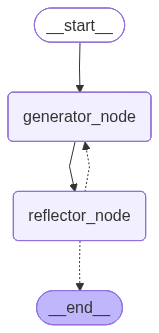

In [19]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = workflow.compile()

png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(png_bytes))

In [20]:
from typing import List, Annotated
import operator

class PlanExecuteState(MessagesState):
    plan: List[str]
    past_steps: Annotated[List[str], operator.add]

def planner_agent(state: PlanExecuteState):
    print("--- PLANNING NEXT STEPS ---")
    # Logic: LLM generates a list of steps
    return {"plan": ["Step 1: Research", "Step 2: Draft", "Step 3: Polish"]}

def executor_agent(state: PlanExecuteState):
    print("--- EXECUTING STEP ---")
    # Logic: Execute the first step in the plan
    current_step = state["plan"][0]
    return {"past_steps": [current_step]}

def replanner_agent(state: PlanExecuteState):
    print("--- UPDATING PLAN ---")
    # Logic: Remove finished step, check if done
    new_plan = state["plan"][1:] # Simple logic: pop first item
    return {"plan": new_plan}

def plan_router(state: PlanExecuteState) -> Literal["executor_agent", END]:
    if not state["plan"]:
        return END
    return "executor_agent"

# Build Graph
workflow = StateGraph(PlanExecuteState)
workflow.add_node("planner_agent", planner_agent)
workflow.add_node("executor_agent", executor_agent)
workflow.add_node("replanner_agent", replanner_agent)

workflow.add_edge(START, "planner_agent")
workflow.add_edge("planner_agent", "executor_agent")
workflow.add_edge("executor_agent", "replanner_agent")
workflow.add_conditional_edges("replanner_agent", plan_router)

In [21]:
from typing import List, Annotated
import operator

class PlanExecuteState(MessagesState):
    plan: List[str]
    past_steps: Annotated[List[str], operator.add]

def planner_agent(state: PlanExecuteState):
    print("--- PLANNING NEXT STEPS ---")
    # Logic: LLM generates a list of steps
    return {"plan": ["Step 1: Research", "Step 2: Draft", "Step 3: Polish"]}

def executor_agent(state: PlanExecuteState):
    print("--- EXECUTING STEP ---")
    # Logic: Execute the first step in the plan
    current_step = state["plan"][0]
    return {"past_steps": [current_step]}

def replanner_agent(state: PlanExecuteState):
    print("--- UPDATING PLAN ---")
    # Logic: Remove finished step, check if done
    new_plan = state["plan"][1:] # Simple logic: pop first item
    return {"plan": new_plan}

def plan_router(state: PlanExecuteState) -> Literal["executor_agent", END]:
    if not state["plan"]:
        return END
    return "executor_agent"

# Build Graph
workflow = StateGraph(PlanExecuteState)
workflow.add_node("planner_agent", planner_agent)
workflow.add_node("executor_agent", executor_agent)
workflow.add_node("replanner_agent", replanner_agent)

workflow.add_edge(START, "planner_agent")
workflow.add_edge("planner_agent", "executor_agent")
workflow.add_edge("executor_agent", "replanner_agent")
workflow.add_conditional_edges("replanner_agent", plan_router)

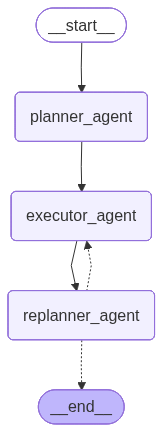

In [23]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = workflow.compile()

png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(png_bytes))

In [24]:
from langgraph.types import Send

# Define specific state for workers
class WorkerState(MessagesState):
    task_description: str

def orchestrator(state: MessagesState):
    print("--- ORCHESTRATOR: DELEGATING ---")
    # Logic: Identify subtasks
    return {"messages": ["Delegating tasks..."]}

# The magic of parallel execution using 'Send'
def map_tasks(state: MessagesState) -> List[Send]:
    # Simulate identifying 3 parallel tasks
    tasks = ["Research topic A", "Research topic B", "Research topic C"]
    return [Send("worker_node", {"task_description": t}) for t in tasks]

def worker_node(state: WorkerState):
    print(f"--- WORKER EXECUTING: {state['task_description']} ---")
    return {"messages": [f"Result for {state['task_description']}"]}

def synthesizer(state: MessagesState):
    print("--- SYNTHESIZING RESULTS ---")
    # Logic: Combine all worker outputs
    return {}

# Build Graph
workflow = StateGraph(MessagesState)
workflow.add_node("orchestrator", orchestrator)
workflow.add_node("worker_node", worker_node)
workflow.add_node("synthesizer", synthesizer)

workflow.add_edge(START, "orchestrator")
workflow.add_conditional_edges("orchestrator", map_tasks, ["worker_node"])
workflow.add_edge("worker_node", "synthesizer")
workflow.add_edge("synthesizer", END)

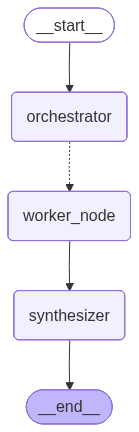

In [25]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = workflow.compile()

png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(png_bytes))

In [29]:
# 1. Define the Child Graph (The "Team")
def child_agent_step(state: MessagesState):
    print("   [Child Graph] Working...")
    return {}

child_workflow = StateGraph(MessagesState)
child_workflow.add_node("child_agent", child_agent_step)
child_workflow.add_edge(START, "child_agent")
child_workflow.add_edge("child_agent", END)
compiled_child_graph = child_workflow.compile()

# 2. Define the Parent Graph
def parent_supervisor(state: MessagesState):
    print("--- PARENT: DELEGATING TO SUBGRAPH ---")
    return {}

def final_review(state: MessagesState):
    print("--- PARENT: REVIEWING SUBGRAPH OUTPUT ---")
    return {}

# Build Parent Graph
parent_workflow = StateGraph(MessagesState)
parent_workflow.add_node("supervisor", parent_supervisor)
# Add the compiled child graph as a node
parent_workflow.add_node("research_team", compiled_child_graph)
parent_workflow.add_node("final_review", final_review)

parent_workflow.add_edge(START, "supervisor")
parent_workflow.add_edge("supervisor", "research_team")
parent_workflow.add_edge("research_team", "final_review")
parent_workflow.add_edge("final_review", END)

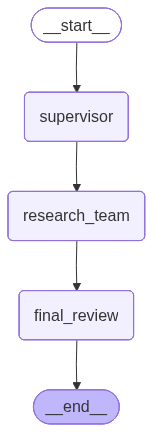

In [30]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = parent_workflow.compile()

png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(png_bytes))

In [31]:
from typing import List
from langgraph.graph import StateGraph, START, END
from typing import Literal

# Define state to hold documents and retry logic
class RAGState(dict):
    question: str
    reformulated_query: str
    documents: List[str]
    answer: str
    retry_count: int

def reformulate_query_node(state: RAGState):
    print(f"--- REFORMULATING QUERY (Attempt {state.get('retry_count', 0) + 1}) ---")
    # Logic: Use LLM to rewrite "It" to "What is the battery life of iPhone 15?"
    return {"reformulated_query": f"Optimized: {state['question']}", "retry_count": state.get("retry_count", 0) + 1}

def retrieve_node(state: RAGState):
    print("--- RETRIEVING DOCUMENTS ---")
    # Logic: VectorDB.search(state['reformulated_query'])
    # Simulating fetching loose results
    docs = ["Doc A: Irrelevant info", "Doc B: Partial info", "Doc C: Exact answer"]
    return {"documents": docs}

def rerank_node(state: RAGState):
    print("--- RERANKING RESULTS ---")
    # Logic: Cross-encoder scoring to push best docs to top
    sorted_docs = sorted(state["documents"], reverse=True) # Mock sort
    return {"documents": sorted_docs}

def evaluate_node(state: RAGState) -> Literal["reformulate_query_node", "generate_answer"]:
    print("--- EVALUATING RELEVANCE ---")
    # Logic: LLM Grader checks "Do these docs answer the question?"

    # Simulation: Fail first attempt, succeed on second
    if state["retry_count"] < 2:
        print("   >>> Grade: UNSATISFACTORY (Retrying)")
        return "reformulate_query_node"

    print("   >>> Grade: SATISFACTORY")
    return "generate_answer"

def generate_answer_node(state: RAGState):
    print("--- GENERATING FINAL ANSWER ---")
    return {"answer": "Here is the answer based on Doc C..."}

# Build Graph
rag_workflow = StateGraph(RAGState)

rag_workflow.add_node("reformulate_query_node", reformulate_query_node)
rag_workflow.add_node("retrieve_node", retrieve_node)
rag_workflow.add_node("rerank_node", rerank_node)
rag_workflow.add_node("generate_answer", generate_answer_node)

# Define Flow
rag_workflow.add_edge(START, "reformulate_query_node")
rag_workflow.add_edge("reformulate_query_node", "retrieve_node")
rag_workflow.add_edge("retrieve_node", "rerank_node")

# Conditional Edge occurs AFTER reranking
rag_workflow.add_conditional_edges(
    "rerank_node",
    evaluate_node,
    {
        "reformulate_query_node": "reformulate_query_node", # The Loop
        "generate_answer": "generate_answer"               # The Exit
    }
)
rag_workflow.add_edge("generate_answer", END)

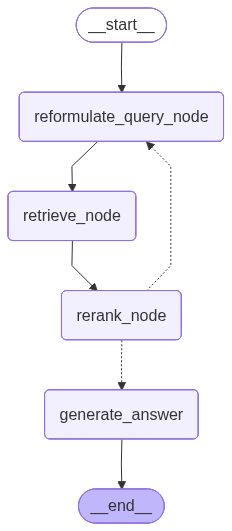

In [32]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = rag_workflow.compile()

png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
display(Image(png_bytes))